<a href="https://colab.research.google.com/github/ishanbaruah/CV/blob/main/Heart_attack_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

file_path='/content/heart_attack_prediction_india.csv'
df=pd.read_csv(file_path)


#Display basic dataset info
print("📌 First 5 rows of the dataset:")
print(df.head())

📌 First 5 rows of the dataset:
   Patient_ID        State_Name  Age  Gender  Diabetes  Hypertension  Obesity  \
0           1         Rajasthan   42  Female         0             0        1   
1           2  Himachal Pradesh   26    Male         0             0        0   
2           3             Assam   78    Male         0             0        1   
3           4            Odisha   58    Male         1             0        1   
4           5         Karnataka   22    Male         0             0        0   

   Smoking  Alcohol_Consumption  Physical_Activity  ...  Diastolic_BP  \
0        1                    0                  0  ...           119   
1        0                    1                  1  ...           115   
2        0                    0                  1  ...           117   
3        0                    0                  1  ...            65   
4        0                    0                  1  ...           109   

   Air_Pollution_Exposure  Family_History  

In [6]:
print("\n📌 Dataset Summary:")
print(df.info())


📌 Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Patient_ID               10000 non-null  int64 
 1   State_Name               10000 non-null  object
 2   Age                      10000 non-null  int64 
 3   Gender                   10000 non-null  object
 4   Diabetes                 10000 non-null  int64 
 5   Hypertension             10000 non-null  int64 
 6   Obesity                  10000 non-null  int64 
 7   Smoking                  10000 non-null  int64 
 8   Alcohol_Consumption      10000 non-null  int64 
 9   Physical_Activity        10000 non-null  int64 
 10  Diet_Score               10000 non-null  int64 
 11  Cholesterol_Level        10000 non-null  int64 
 12  Triglyceride_Level       10000 non-null  int64 
 13  LDL_Level                10000 non-null  int64 
 14  HDL_Level          

In [7]:
print("\n📌 Check Missing values")
print(df.isnull().sum())


📌 Check Missing values
Patient_ID                 0
State_Name                 0
Age                        0
Gender                     0
Diabetes                   0
Hypertension               0
Obesity                    0
Smoking                    0
Alcohol_Consumption        0
Physical_Activity          0
Diet_Score                 0
Cholesterol_Level          0
Triglyceride_Level         0
LDL_Level                  0
HDL_Level                  0
Systolic_BP                0
Diastolic_BP               0
Air_Pollution_Exposure     0
Family_History             0
Stress_Level               0
Healthcare_Access          0
Heart_Attack_History       0
Emergency_Response_Time    0
Annual_Income              0
Health_Insurance           0
Heart_Attack_Risk          0
dtype: int64


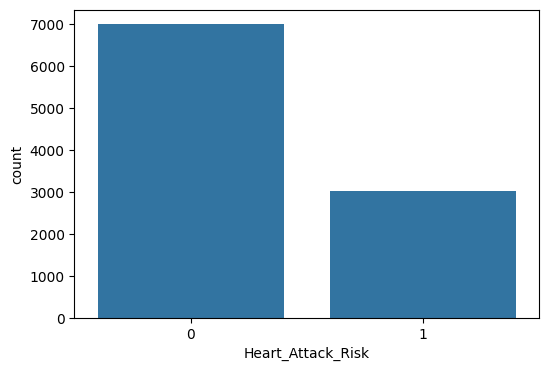

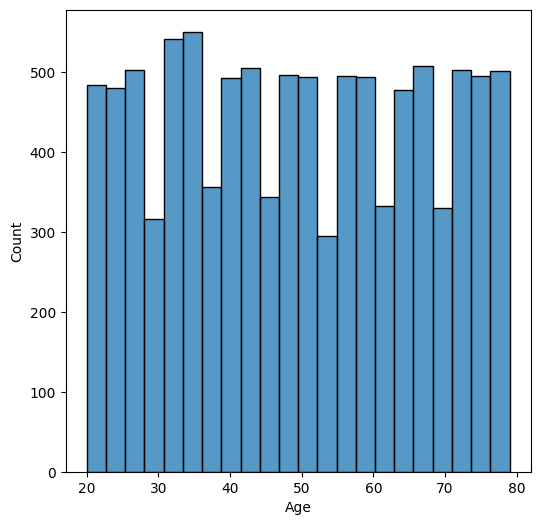

In [13]:
# -------------------------------------------------
# 🔹 1. DISTRIBUTION OF HEART ATTACK RISK
# -------------------------------------------------


#countplot to viz heart attack risk
plt.figure(figsize=(6,4))
sns.countplot(x='Heart_Attack_Risk',data=df)
plt.show()

#aroud 30% are in Risk

# -------------------------------------------------
# 🔹 2. AGE DISTRIBUTION
# -------------------------------------------------

plt.figure(figsize=(6,6))
sns.histplot(x='Age',data=df)
plt.show()

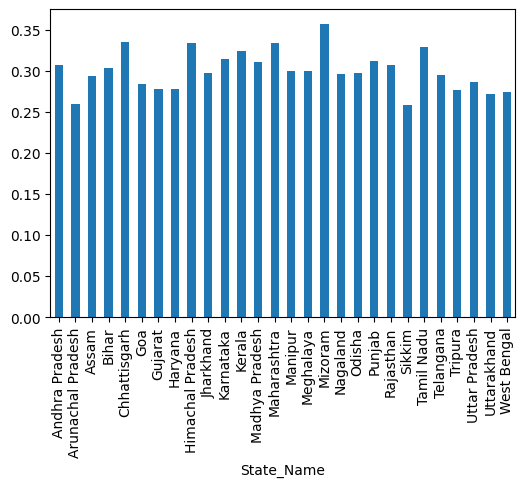

In [18]:
# -------------------------------------------------
# 🔹 4. STATE-WISE HEART ATTACK RISK
# -------------------------------------------------
plt.figure(figsize=(6,4))
state_risk=df.groupby("State_Name")["Heart_Attack_Risk"].mean()
state_risk.plot(kind='bar')
plt.show()

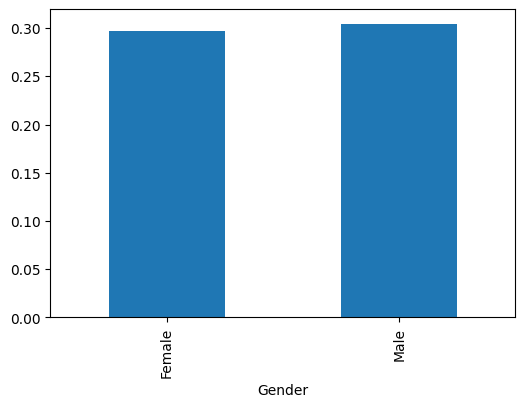

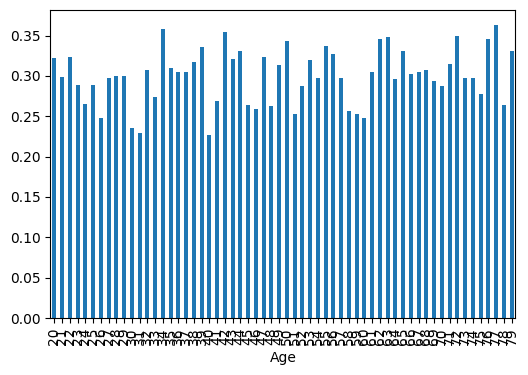

In [20]:
# -------------------------------------------------
# 🔹 5. GENDER HEART ATTACK RISK
# -------------------------------------------------
plt.figure(figsize=(6,4))
state_risk=df.groupby("Gender")["Heart_Attack_Risk"].mean()
state_risk.plot(kind='bar')
plt.show()




/tmp/ipython-input-24-786775870.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_risk = df.groupby("Age_Group")["Heart_Attack_Risk"].mean()


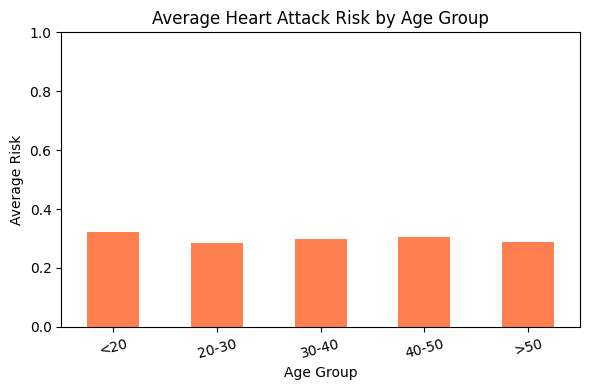

In [24]:
bins=[0,20,30,40,50,60]
labels=['<20','20-30','30-40','40-50','>50']
df['Age_Group']=pd.cut(df['Age'],bins=bins,labels=labels)
age_group_risk = df.groupby("Age_Group")["Heart_Attack_Risk"].mean()
plt.figure(figsize=(6, 4))
age_group_risk.plot(kind='bar', color='coral')

plt.title("Average Heart Attack Risk by Age Group")
plt.ylabel("Average Risk")
plt.xlabel("Age Group")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


/tmp/ipython-input-27-1058655626.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_risk = df.groupby("salary_groups")["Heart_Attack_Risk"].mean()


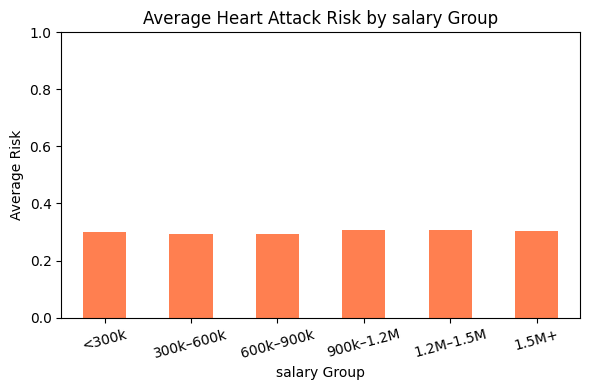

In [27]:
bins = [0, 300000, 600000, 900000, 1200000, 1500000, float('inf')]
labels = ['<300k', '300k–600k', '600k–900k', '900k–1.2M', '1.2M–1.5M', '1.5M+']

# Perform the binning
df['salary_groups'] = pd.cut(df['Annual_Income'], bins=bins, labels=labels)
age_group_risk = df.groupby("salary_groups")["Heart_Attack_Risk"].mean()
plt.figure(figsize=(6, 4))
age_group_risk.plot(kind='bar', color='coral')

plt.title("Average Heart Attack Risk by salary Group")
plt.ylabel("Average Risk")
plt.xlabel("salary Group")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

/tmp/ipython-input-28-1544011049.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_risk = df.groupby("Cholesterol_Level")["Heart_Attack_Risk"].mean()


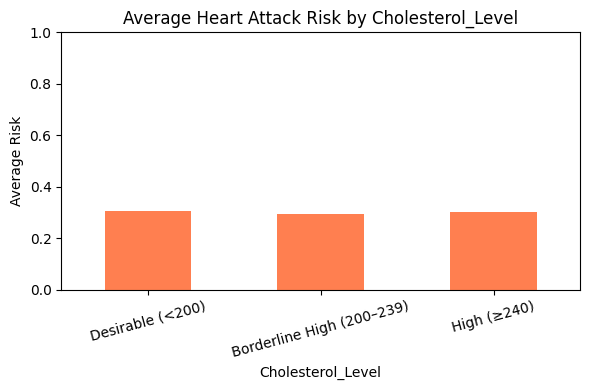

In [28]:
bins = [0, 199, 239, float('inf')]
labels = ['Desirable (<200)', 'Borderline High (200–239)', 'High (≥240)']


# Perform the binning
df['Cholesterol_Level'] = pd.cut(df['Cholesterol_Level'], bins=bins, labels=labels)
age_group_risk = df.groupby("Cholesterol_Level")["Heart_Attack_Risk"].mean()
plt.figure(figsize=(6, 4))
age_group_risk.plot(kind='bar', color='coral')

plt.title("Average Heart Attack Risk by Cholesterol_Level")
plt.ylabel("Average Risk")
plt.xlabel("Cholesterol_Level")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

/tmp/ipython-input-29-3847920499.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_risk = df.groupby("Triglyceride_Level")["Heart_Attack_Risk"].mean()


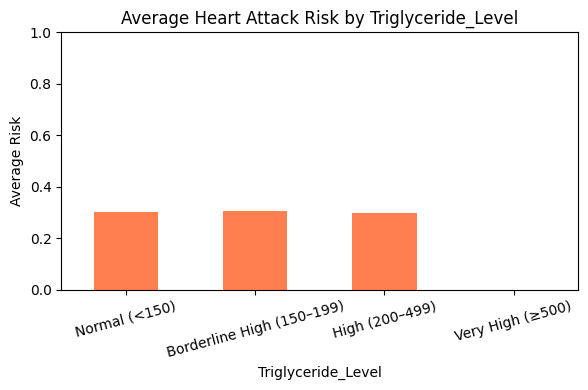

In [29]:
bins = [0, 149, 199, 499, float('inf')]
labels = ['Normal (<150)', 'Borderline High (150–199)', 'High (200–499)', 'Very High (≥500)']

# Perform the binning
df['Triglyceride_Level'] = pd.cut(df['Triglyceride_Level'], bins=bins, labels=labels)
age_group_risk = df.groupby("Triglyceride_Level")["Heart_Attack_Risk"].mean()
plt.figure(figsize=(6, 4))
age_group_risk.plot(kind='bar', color='coral')

plt.title("Average Heart Attack Risk by Triglyceride_Level")
plt.ylabel("Average Risk")
plt.xlabel("Triglyceride_Level")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

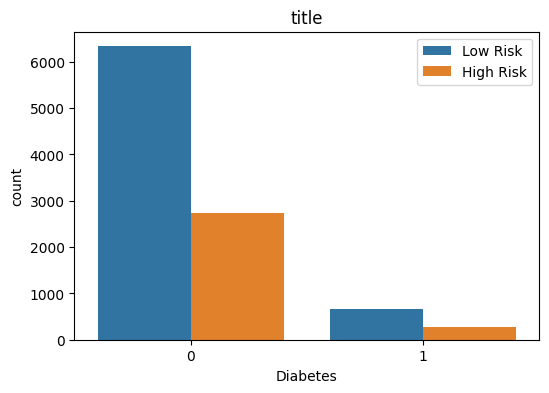

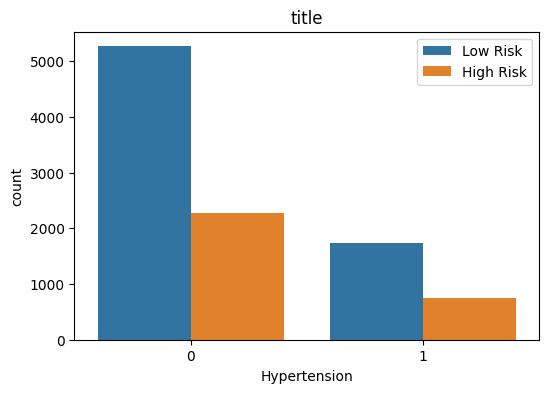

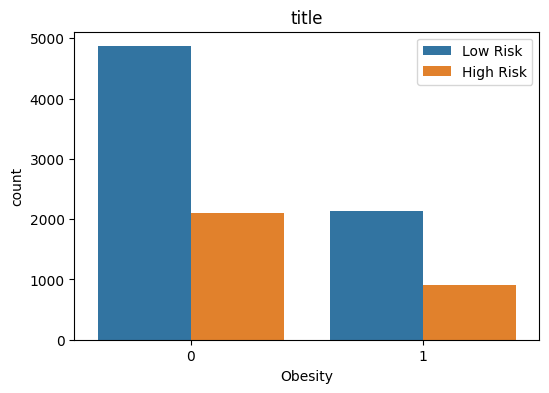

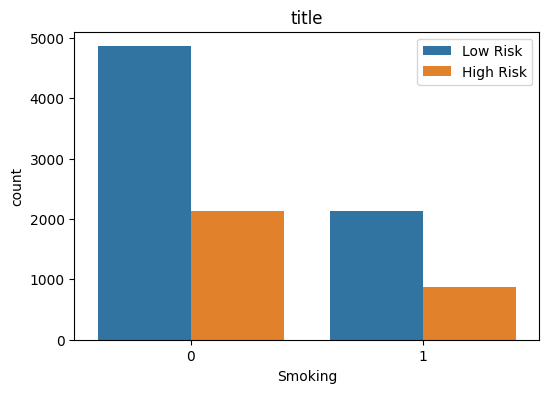

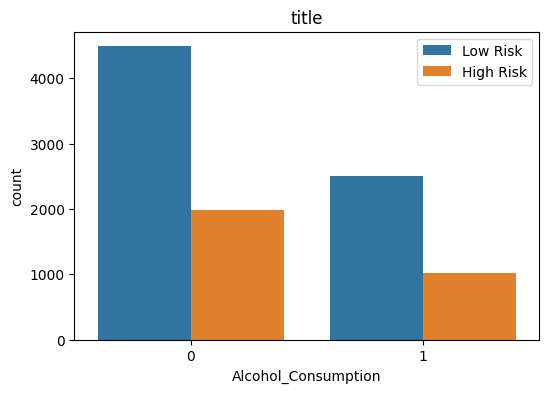

In [31]:
def plot_risk_factor(column,title):
    plt.figure(figsize=(6,4))
    sns.countplot(x=column,hue="Heart_Attack_Risk", data=df)
    plt.title("title")
    plt.xlabel(column)
    plt.ylabel("count")
    plt.legend(["Low Risk", "High Risk"])
    plt.show()

# Plot for diabetes
plot_risk_factor("Diabetes", "Diabetes & Heart Attack Risk")

# Plot for hypertension
plot_risk_factor("Hypertension", "Hypertension & Heart Attack Risk")

# Plot for obesity
plot_risk_factor("Obesity", "Obesity & Heart Attack Risk")

# Plot for smoking
plot_risk_factor("Smoking", "Smoking & Heart Attack Risk")

# Plot for alcohol consumption
plot_risk_factor("Alcohol_Consumption", "Alcohol Consumption & Heart Attack Risk")

/tmp/ipython-input-34-2029524914.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")


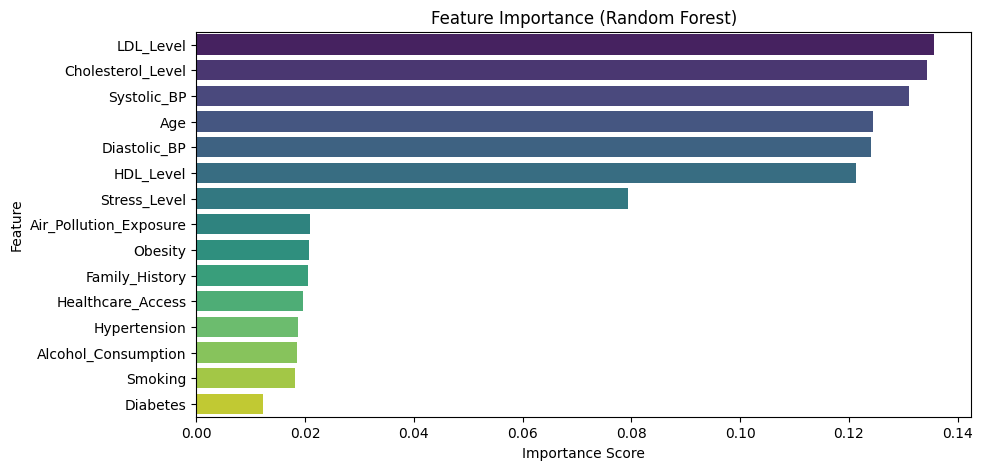


✅ Model Accuracy: 70.20%

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.99      0.82      1411
           1       0.27      0.01      0.01       589

    accuracy                           0.70      2000
   macro avg       0.49      0.50      0.42      2000
weighted avg       0.58      0.70      0.59      2000



In [34]:
# -------------------------------------------------
# 🔹 7. FEATURE IMPORTANCE ANALYSIS (Random Forest)
# -------------------------------------------------

# Selecting features for model training
feature_cols = ["Age", "Diabetes", "Hypertension", "Obesity", "Smoking", "Alcohol_Consumption", "Cholesterol_Level", "LDL_Level", "HDL_Level", "Systolic_BP", "Diastolic_BP", "Air_Pollution_Exposure", "Family_History", "Stress_Level", "Healthcare_Access"]
X = df[feature_cols]  # Independent variables
y = df["Heart_Attack_Risk"]  # Target variable

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Feature importance visualization
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": feature_cols, "Importance": importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# -------------------------------------------------
# 🔹 8. MODEL EVALUATION
# -------------------------------------------------

# Predictions on test set
y_pred = model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {accuracy:.2%}")

# Detailed classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))
